In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For inline charts
%matplotlib inline

# Settings
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv('../data/raw/wfp_food_prices_rwa.csv', low_memory=False)

# Show first rows
df.head()


In [7]:
print("Basic Dataset Information:")
print("=" * 30)
print("INFORMATION:")
print("=" * 30)

df.info()

print("DESCRIBUTION:")
print("=" * 30)

print(df.describe())

print("COLUMNS:")
print("=" * 30)
print(df.columns)

print("SHAPE:")
print("=" * 30)
print(df.shape)

print("HEAD:")
df.head()






Basic Dataset Information:
INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143130 entries, 0 to 143129
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          143130 non-null  object
 1   admin1        143130 non-null  object
 2   admin2        143130 non-null  object
 3   market        143130 non-null  object
 4   market_id     143130 non-null  object
 5   latitude      143130 non-null  object
 6   longitude     143130 non-null  object
 7   category      143130 non-null  object
 8   commodity     143130 non-null  object
 9   commodity_id  143130 non-null  object
 10  unit          143130 non-null  object
 11  priceflag     143130 non-null  object
 12  pricetype     143130 non-null  object
 13  currency      143130 non-null  object
 14  price         143130 non-null  object
 15  usdprice      143130 non-null  object
dtypes: object(16)
memory usage: 17.5+ MB
DESCRIBUTION:
              date 

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,2000-01-15,Kigali City,Nyarugenge,Kigali,1076,-1.95,30.06,pulses and nuts,Beans,50,KG,actual,Wholesale,RWF,108.02,0.32
2,2000-02-15,Kigali City,Nyarugenge,Kigali,1076,-1.95,30.06,cereals and tubers,Maize,51,KG,actual,Wholesale,RWF,152.66,0.45
3,2000-02-15,Kigali City,Nyarugenge,Kigali,1076,-1.95,30.06,pulses and nuts,Beans,50,KG,actual,Wholesale,RWF,110.22,0.32
4,2000-03-15,Kigali City,Nyarugenge,Kigali,1076,-1.95,30.06,cereals and tubers,Maize,51,KG,actual,Wholesale,RWF,159.27,0.47


Check for missing values:

In [9]:
df.isnull().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

Fill numeric columns' missing values with mean:


In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(df['price'].mean(), inplace=True)
#After filling missing values
print("Missing values in 'price' column after filling with mean:")
print(df['price'].isnull().sum())
df['price'].isnull().sum()

4. Date Preprocessing

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # drop rows with invalid dates

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%B')

print("Date Preprocessing Completed:")
print("=" * 30)
print("Unique Years:", df['year'].unique())
print("Unique Months:", df['month'].unique())   
print("Unique Month Names:", df['month_name'].unique())
print("Total Rows:", len(df))
print("Total Columns:", len(df.columns))
print("Data Types:")
print(df.dtypes)
print("=" * 30)
print("Data Preprocessing Completed Successfully!")

Date Preprocessing Completed:
Unique Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]
Unique Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique Month Names: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Total Rows: 143129
Total Columns: 19
Data Types:
date            datetime64[ns]
admin1                  object
admin2                  object
market                  object
market_id               object
latitude                object
longitude               object
category                object
commodity               object
commodity_id            object
unit                    object
priceflag               object
pricetype               object
currency                object
price                  float64
usdprice                object
year                     int32
month                    int32
month_name              object

5. Key Questions to Explore

What are the most common food commodities?

Which provinces are reported?

How have prices changed over time?

What are the top commodities with highest average prices?

Top 10 Most Frequently Reported Commodities:
commodity
Beans (dry)         6153
Maize flour         6024
Potatoes (Irish)    5736
Cassava flour       5683
Sorghum             5477
Maize               5199
Bananas             5029
Sweet potatoes      4149
Cassava             3973
Passion fruit       3789
Name: count, dtype: int64


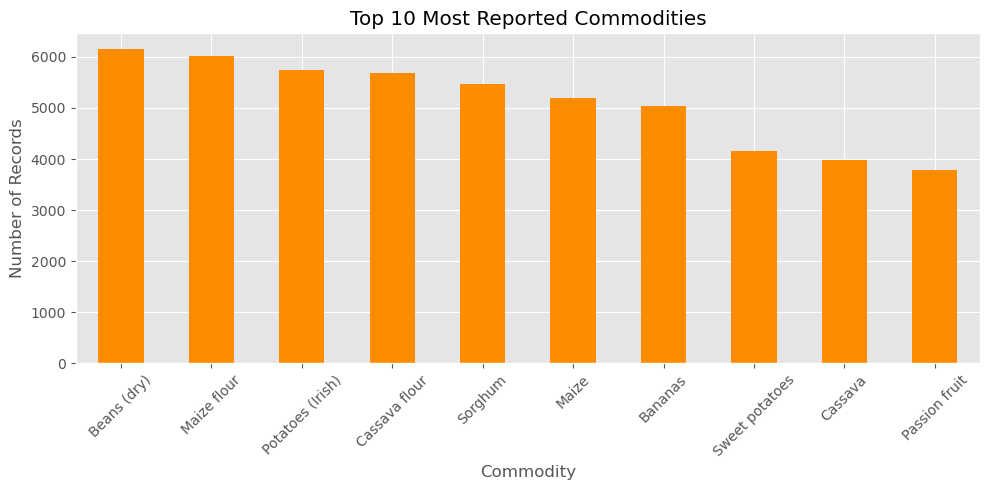

In [21]:
# What are the most common food commodities?

# Count occurrences of each commodity
top_commodities = df['commodity'].value_counts().head(10)

# Display top 10
print("Top 10 Most Frequently Reported Commodities:")
print(top_commodities)

# Bar chart
top_commodities.plot(kind='bar', figsize=(10,5), title='Top 10 Most Reported Commodities', color='darkorange')
plt.xlabel("Commodity")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



2. Which provinces are reported?

Provinces in Dataset:
['Kigali City' 'Eastern Province' 'Northern Province' 'Southern Province'
 'Western Province']


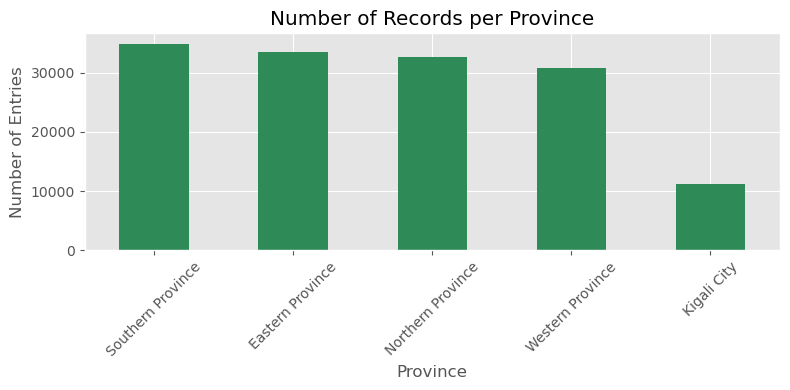

In [22]:
# Check unique values in 'admin1'
print("Provinces in Dataset:")
print(df['admin1'].unique())

# Visualize number of records per province
df['admin1'].value_counts().plot(kind='bar', title="Number of Records per Province", figsize=(8,4), color='seagreen')
plt.xlabel("Province")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 3. How have prices changed over time?

We'll explore overall trend and pick a commodity example (like Beans)

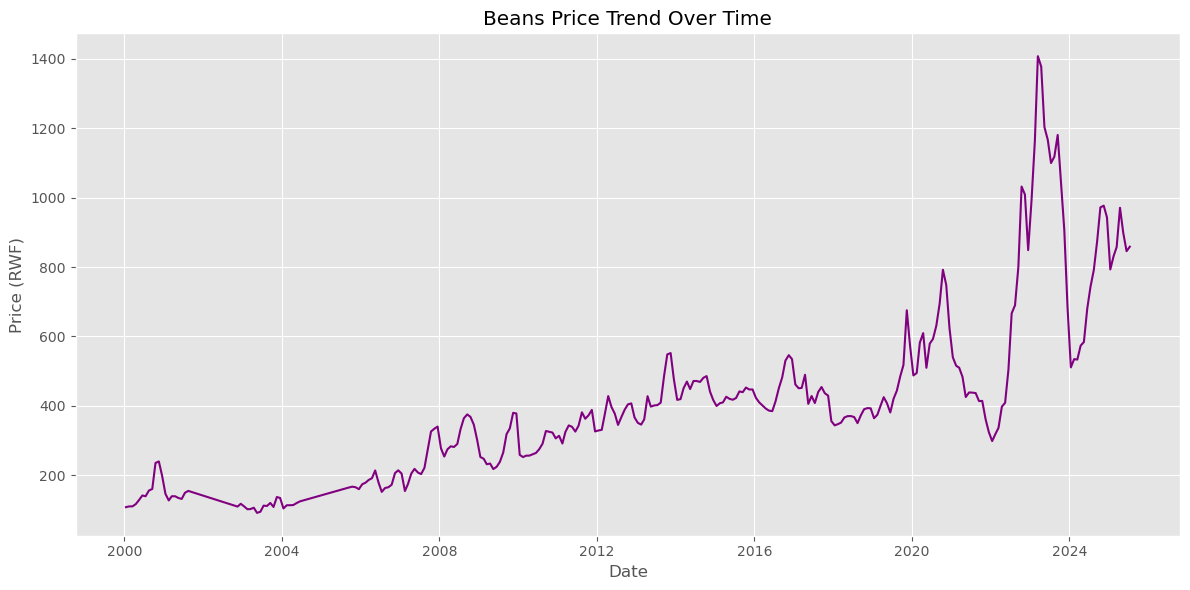

In [24]:
beans_df = df[df['commodity'].str.contains("Beans", case=False)]
beans_trend = beans_df.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(beans_trend['date'], beans_trend['price'], color='purple')
plt.title("Beans Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Price (RWF)")
plt.grid(True)
plt.tight_layout()
plt.show()


4. What are the top commodities with highest average prices?

Top 10 Commodities by Average Price:
commodity
Livestock (cattle)    183585.268840
Livestock (pig)        47640.840811
Livestock (Goat)       21459.475173
Livestock (Sheep)      17307.367641
Charcoal                5471.875805
Livestock (hen)         3996.043659
Garlic                  2536.305022
Apples (red)            2486.740789
Meat (goat)             2478.157223
Fish (dry)              2384.164014
Name: price, dtype: float64


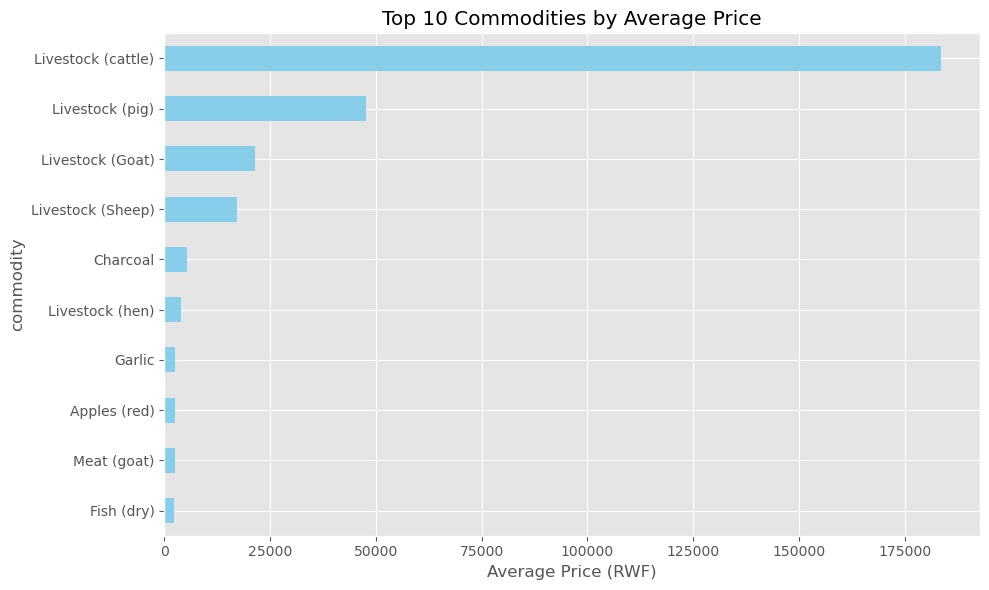

In [25]:
# Calculate mean price by commodity
top_avg_price = df.groupby('commodity')['price'].mean().sort_values(ascending=False).head(10)

# Display
print("Top 10 Commodities by Average Price:")
print(top_avg_price)

# Bar chart
top_avg_price.plot(kind='barh', figsize=(10,6), color='skyblue', title="Top 10 Commodities by Average Price")
plt.xlabel("Average Price (RWF)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


6. Most Reported Commodities

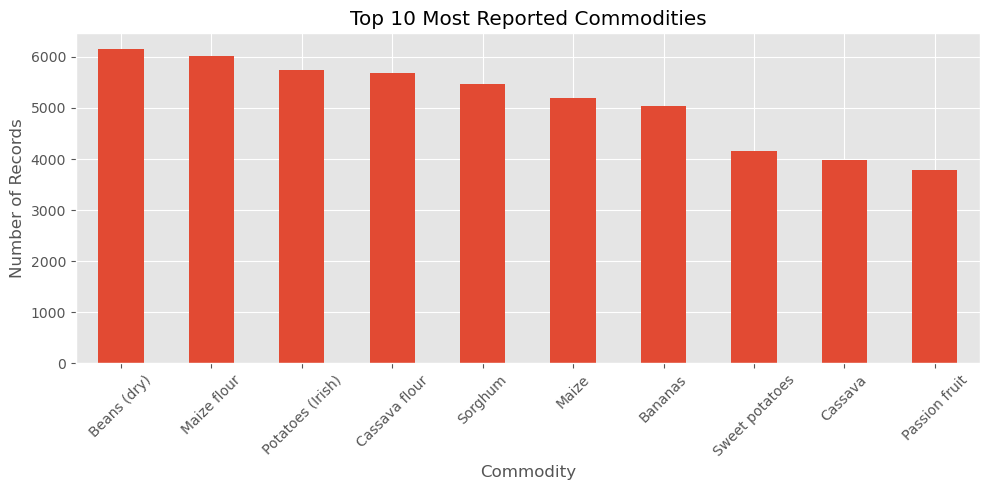

In [26]:
df['commodity'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Reported Commodities', figsize=(10,5))
plt.ylabel("Number of Records")
plt.xlabel("Commodity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7. Prices by Province

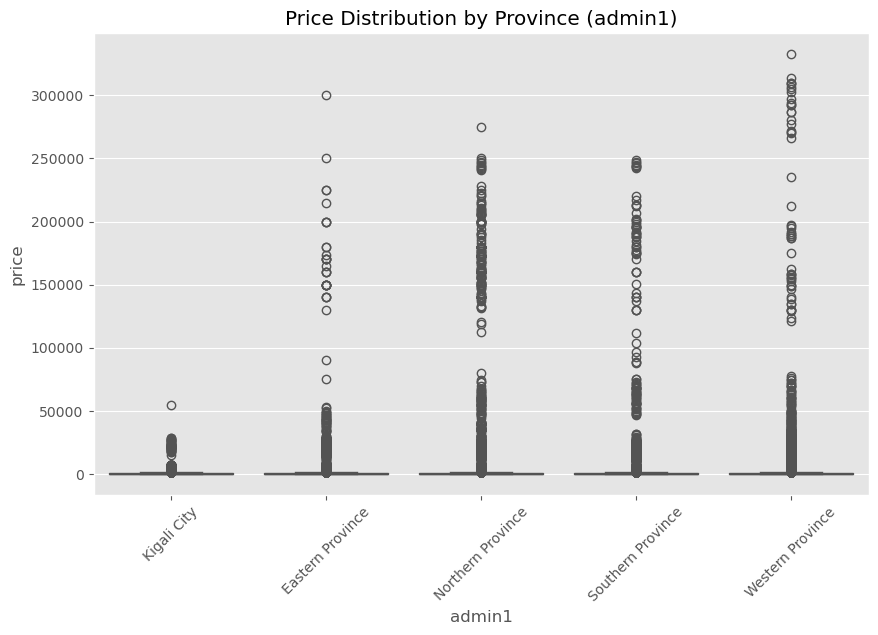

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='admin1', y='price', data=df)
plt.title("Price Distribution by Province (admin1)")
plt.xticks(rotation=45)
plt.show()


8. Average Prices by Commodity

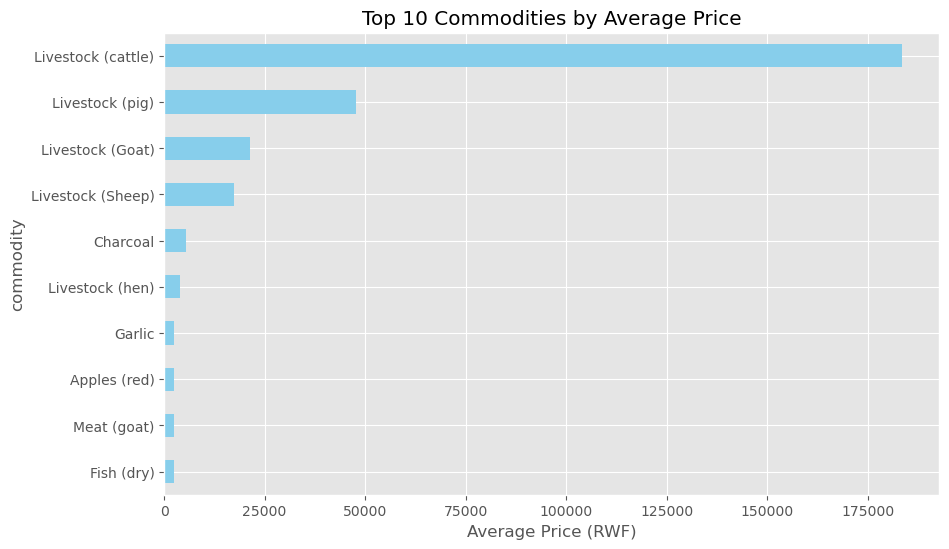

In [28]:
avg_price = df.groupby('commodity')['price'].mean().sort_values(ascending=False).head(10)

avg_price.plot(kind='barh', title="Top 10 Commodities by Average Price", figsize=(10,6), color='skyblue')
plt.xlabel("Average Price (RWF)")
plt.gca().invert_yaxis()
plt.show()


9. Price Trends Over Time (e.g. Maize)

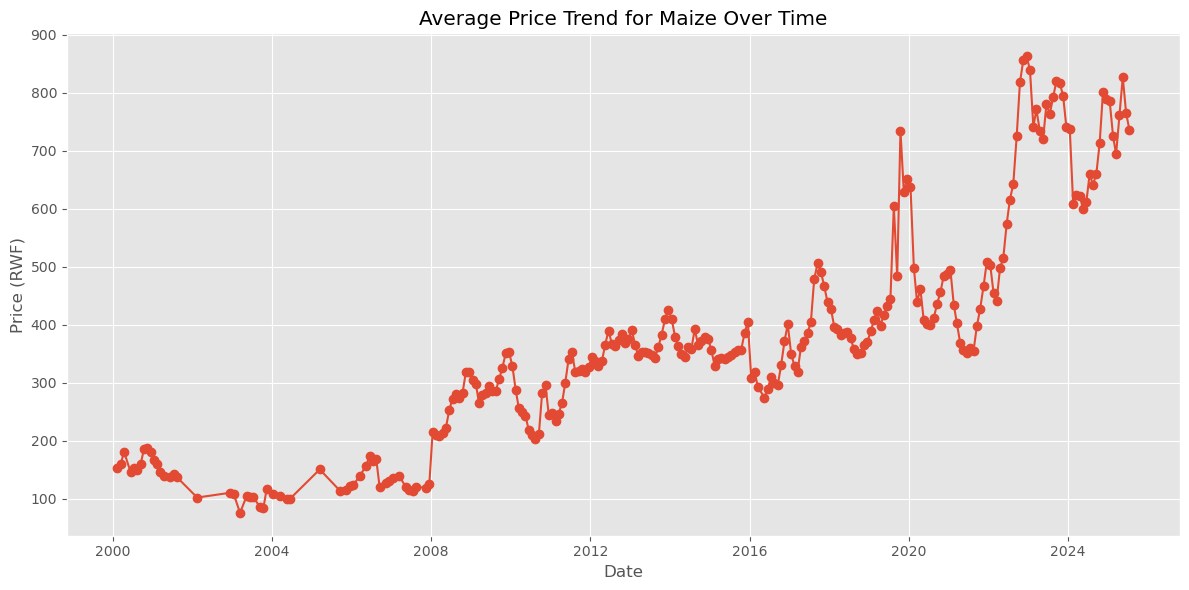

In [29]:
maize = df[df['commodity'].str.lower().str.contains('maize')]

maize_grouped = maize.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(maize_grouped['date'], maize_grouped['price'], marker='o')
plt.title('Average Price Trend for Maize Over Time')
plt.ylabel('Price (RWF)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


10. Monthly Trend Heatmap

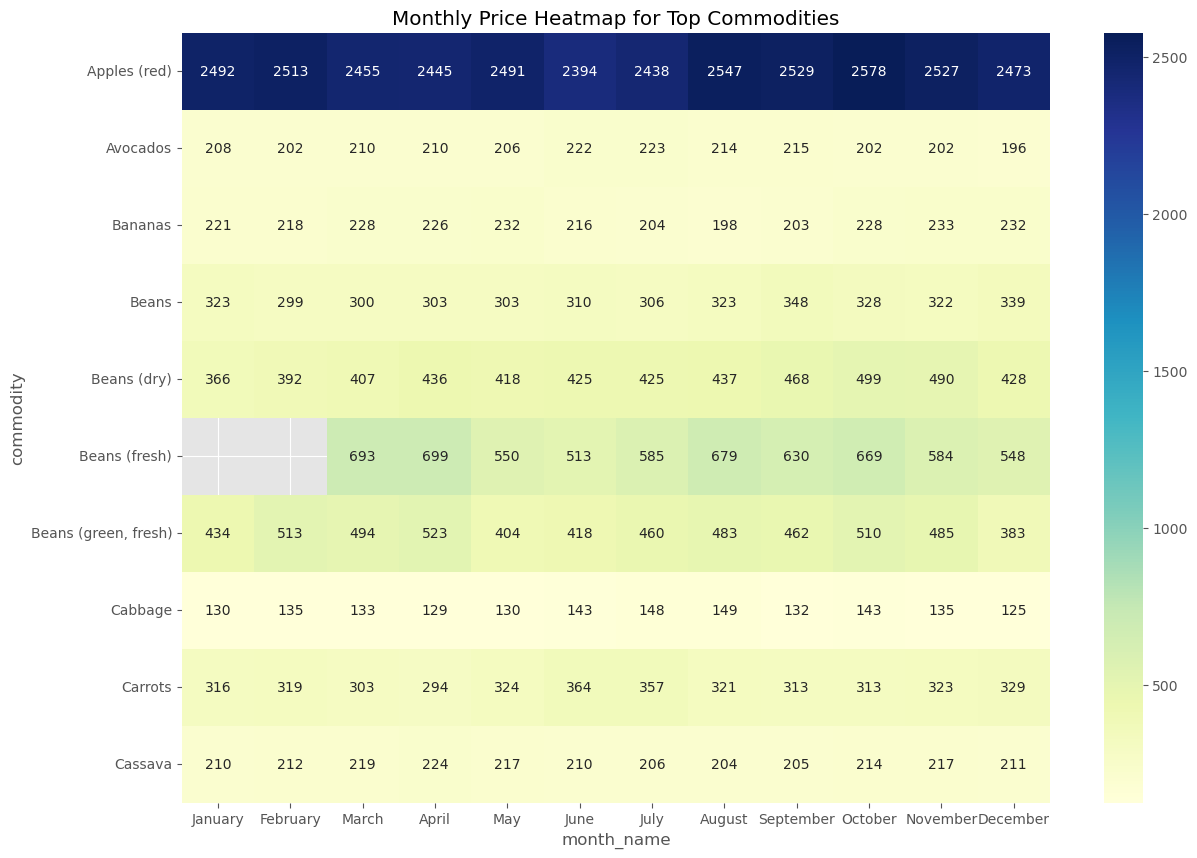

In [30]:
heatmap_data = df.pivot_table(index='commodity', columns='month_name', values='price', aggfunc='mean')

# Order months correctly
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data.head(10), annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Price Heatmap for Top Commodities")
plt.show()


In [36]:
print("Buid interactive plots for the Maize Price Trend")
fig = px.line(maize_grouped, x='date', y='price', title='Maize Price Trend (Interactive)', markers=True)
fig.show()

Buid interactive plots for the Maize Price Trend


11. Export Cleaned Data for Power BI